# Elements as Ophyd Objects

## Prepare Bluesky and trigger a simulated Sirepo detector in SRW


Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:

In [1]:
from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, _ = connection.auth("srw", "00000001")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

%run -i ../../examples/prepare_det_env.py




Transient Scan ID: 1     Time: 2021-12-14 15:11:45
Persistent Unique Scan ID: '69a79c68-e7c2-4e0f-8f8a-c6d669c2781f'
New stream: 'primary'
+-----------+------------+-------------------------+-----------------+
|   seq_num |       time | aperture_horizontalSize | watchpoint_mean |
+-----------+------------+-------------------------+-----------------+
|         1 | 15:11:52.5 |                   0.000 |           0.000 |
|         2 | 15:11:56.8 |                   2.000 | 344627463288300.812 |
+-----------+------------+-------------------------+-----------------+
generator scan ['69a79c68'] (scan num: 1)



                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2021-12-14 20:11:52.520572901                      0.0   
2       2021-12-14 20:11:56.811706066                      2.0   

                               watchpoint_sirepo_data_json  \
seq_num                                                  

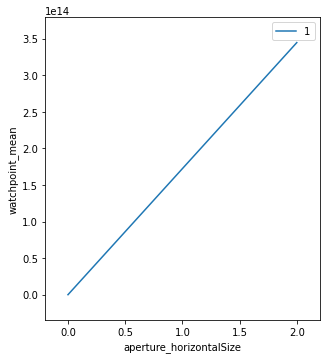

In [2]:
aperture.horizontalSize.kind = "hinted"  # noqa F821

(uid,) = RE(bp.scan([watchpoint], aperture.horizontalSize, 0, 2, 2))  # noqa F821
hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

watchpoint_image = np.array(list(hdr.data("watchpoint_image")))

In [4]:
hdr = db[-1]
table = hdr.table()
table

,time,aperture_horizontalSize,watchpoint_sirepo_data_json,watchpoint_sirepo_data_hash,watchpoint_duration,watchpoint_image,watchpoint_shape,watchpoint_mean,watchpoint_photon_energy,watchpoint_horizontal_extent,watchpoint_vertical_extent,watchpoint_id,watchpoint_title,watchpoint_type,watchpoint_element_position
seq_num,,,,,,,,,,,,,,,
1,2021-12-14 20:11:52.520572901,0.0,"{""models"": {""arbitraryMagField"": {""interpolati...",8f66e8892005801bfd9e36835a840ecfbb0edecdb2eaba...,7.279625,f9a403cd-bf1a-490d-bc57-7769dc3e4209/0,"[160, 70]",0.000000e+00,9000.0,"[-0.00024000000000000006, 0.00024]","[-0.00036, 0.0003599999999999998]",3,Watchpoint,watch,24
2,2021-12-14 20:11:56.811706066,2.0,"{""models"": {""arbitraryMagField"": {""interpolati...",9b60743d94b6fdb5b3900279f7b77c35fe21a33a0df6af...,4.196261,c905e019-ba37-4537-a4ab-a616cd063043/0,"[160, 70]",3.446275e+14,9000.0,"[-0.00023400080664737227, 0.00023400080664737227]","[-0.0003070232779722708, 0.0003070232779722707]",3,Watchpoint,watch,24


In [11]:
hdr.table()#['duration']

,time,aperture_horizontalSize,watchpoint_sirepo_data_json,watchpoint_sirepo_data_hash,watchpoint_duration,watchpoint_image,watchpoint_shape,watchpoint_mean,watchpoint_photon_energy,watchpoint_horizontal_extent,watchpoint_vertical_extent,watchpoint_id,watchpoint_title,watchpoint_type,watchpoint_element_position
seq_num,,,,,,,,,,,,,,,
1,2021-12-14 20:11:52.520572901,0.0,"{""models"": {""arbitraryMagField"": {""interpolati...",8f66e8892005801bfd9e36835a840ecfbb0edecdb2eaba...,7.279625,f9a403cd-bf1a-490d-bc57-7769dc3e4209/0,"[160, 70]",0.000000e+00,9000.0,"[-0.00024000000000000006, 0.00024]","[-0.00036, 0.0003599999999999998]",3,Watchpoint,watch,24
2,2021-12-14 20:11:56.811706066,2.0,"{""models"": {""arbitraryMagField"": {""interpolati...",9b60743d94b6fdb5b3900279f7b77c35fe21a33a0df6af...,4.196261,c905e019-ba37-4537-a4ab-a616cd063043/0,"[160, 70]",3.446275e+14,9000.0,"[-0.00023400080664737227, 0.00023400080664737227]","[-0.0003070232779722708, 0.0003070232779722707]",3,Watchpoint,watch,24


In [13]:
list(hdr.data("watchpoint_duration"))

[7.279624621000001, 4.196261014999999]